In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
import os

In [13]:
dataset = pd.DataFrame()
path_1 = "/kaggle/input/data-17-02-2023-60s"
dir_list_1 = os.listdir(path_1)
for name_file in dir_list_1:
    dataset = pd.concat([dataset,pd.read_csv(path_1 + "/" + name_file)])
    
path_2 = "/kaggle/input/test-data-21-02-2023"
dir_list_2 = os.listdir(path_2)
for name_file in dir_list_2:
    dataset = pd.concat([dataset,pd.read_csv(path_2 + "/" + name_file)])
    
dataset.fillna(0, inplace=True)
dataset = dataset.drop('EVENT_TIME', axis = 1)
dataset = dataset.drop('Unnamed: 0', axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.02, shuffle=False)

In [15]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [16]:
one_svm = OneClassSVM(gamma='auto', nu=0.01).fit(train)
test_predict = one_svm.predict(test)

In [17]:
test_predict = [1 if i==-1 else 0 for i in test_predict]
from sklearn.metrics import classification_report
print(classification_report(np.zeros((pd.DataFrame(test_predict)).shape[0]),test_predict))

In [19]:
print(test_predict)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]


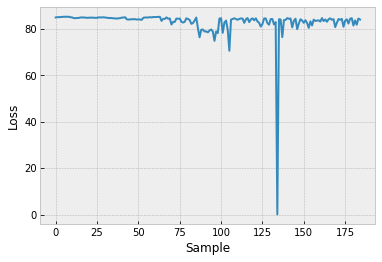

In [25]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.plot(one_svm.score_samples(test))

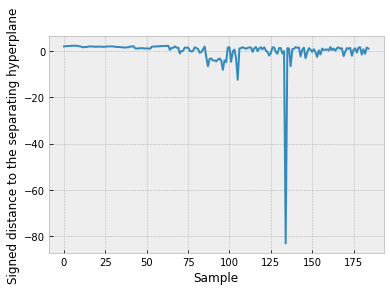

In [29]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.xlabel('Sample')
plt.ylabel('Signed distance to the separating hyperplane')
plt.plot(one_svm.decision_function(test))

In [20]:
# data_train = dataPCA.iloc[list(range(50000))]
# data_test = dataPCA.iloc[list(range(50000, 53000))]

In [21]:
# import matplotlib.pyplot as plt
# from matplotlib import style
# #Getting unique labels
 
# u_labels = np.unique(label)
 
# #plotting the results:
 
# for i in u_labels:
#     plt.scatter(dataPCA[label == i].iloc[:,0] , dataPCA[label == i].iloc[:,1] , label = i)
# plt.legend()
# plt.show()

In [22]:
# import pylab as p
# from matplotlib import pyplot
# from mpl_toolkits.mplot3d import Axes3D
# fig = pyplot.figure()
# ax = Axes3D(fig)

# u_labels = np.unique(label)

# for i in u_labels:
#     ax.scatter(dataPCA[label == i].iloc[:,0] , dataPCA[label == i].iloc[:,1], dataPCA[label == i].iloc[:,2])
# fig.add_axes(ax)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# fig.add_axes(ax)
# p.show()